### Predicting who is most likely to have a bank account

In [1]:
pip install expectexception

Note: you may need to restart the kernel to use updated packages.


In [35]:
import time as t
import datetime as dt
import expectexception

In [36]:
print(t.asctime(t.localtime(t.time())))
print(dt.datetime.now())


Mon Oct  2 00:27:16 2023
2023-10-02 00:27:16.347600


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import warnings

In [38]:
np.random.seed(123)

In [39]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
##from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


In [41]:
train=pd.read_csv('.\data\Train_v2.csv')
test=pd.read_csv('.\data\Test_v2.csv')
submission=pd.read_csv('.\data\SampleSubmission.csv')

In [42]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [43]:
train[:10]

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7,26,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7,32,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1,42,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3,54,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3,76,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [44]:
train.tail()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


In [45]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [46]:
submission.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [48]:
train.shape

(23524, 13)

In [49]:
test.shape

(10086, 12)

In [50]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [51]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,23524.0,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
household_size,23524.0,3.797483,2.227613,1.0,2.0,3.0,5.0,21.0
age_of_respondent,23524.0,38.805220,16.520569,16.0,26.0,35.0,49.0,100.0


In [52]:
total=train[['year', 'household_size', 'age_of_respondent']].sum()

In [53]:
total

year                 47447342
household_size          89332
age_of_respondent      912854
dtype: int64

#### Preprocessing Data

In [54]:
y_train=train['bank_account']
X_train=train.drop(columns=['uniqueid','bank_account',], axis=1)

In [55]:
le=LabelEncoder()
y_train=le.fit_transform(y_train).reshape(-1,1)

In [56]:
y_train

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [57]:
le=LabelEncoder()

In [58]:
def preprocessing_data(data):
    float_array=data[['household_size', 'age_of_respondent','year']].values.astype(float)
    categ=["relationship_with_head", "marital_status","job_type","country",]
    data=pd.get_dummies(data, prefix_sep="_", columns=categ)
    data['location_type']=le.fit_transform(train['location_type'])
    data['cellphone_access']=le.fit_transform(train['cellphone_access'])
    data['gender_of_respondent']=le.fit_transform(train['gender_of_respondent'])

    scaler=MinMaxScaler(feature_range=(0,1))
    data=scaler.fit_transform(data)
    
    return data

processed_test_data=preprocessing_data(X_train)

In [59]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [60]:
X_train['location_type']=le.fit_transform(X_train['location_type'])
X_train['cellphone_access']=le.fit_transform(X_train['cellphone_access'])
X_train['gender_of_respondent']=le.fit_transform(X_train['gender_of_respondent'])

In [61]:
X_train.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,0,1,3,24,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,0,5,70,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,1,5,26,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,1,5,34,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,1,0,8,26,1,Child,Single/Never Married,Primary education,Informally employed


In [62]:
X_train.shape

(23524, 11)

In [63]:
cols=["relationship_with_head", "marital_status","job_type","country"]
X_train=pd.get_dummies(X_train, prefix_sep="_", columns=cols)

In [64]:
X_train.head()

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,education_level,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,2018,0,1,3,24,0,Secondary education,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2018,0,0,5,70,0,No formal education,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,2018,1,1,5,26,1,Vocational/Specialised training,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2018,0,1,5,34,0,Primary education,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2018,1,0,8,26,1,Primary education,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [65]:
cols=["education_level"]
X_train=pd.get_dummies(X_train, prefix_sep="_", columns=cols)

In [66]:
X_train.head()

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training
0,2018,0,1,3,24,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,2018,0,0,5,70,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,2018,1,1,5,26,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,2018,0,1,5,34,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,2018,1,0,8,26,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


#### Using Feature selection to chose the best feature

In [67]:
from sklearn.feature_selection import SelectKBest, chi2

X=X_train[:,0:20]
y=y_train

bestfeatures= SelectKBest(score_func=chi2, k=10)
fit=bestfeatures.fit(X,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
featuresScores=pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns=['Specs', 'score']
print(featuresScores.nlargest(10, 'Score'))

InvalidIndexError: (slice(None, None, None), slice(0, 20, None))

In [68]:
from sklearn.feature_selection  import SelectKBest, chi2
X=X_train.iloc[:,0:20]
y=y_train


#applying selectkbest class to extract top to best features
bestfeatures=SelectKBest(score_func=chi2, k=10)
fit=bestfeatures.fit(X,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns) #concat two dataframes for better visualization
featureScores=pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns=['Specs', 'Score'] #naming the dataframe columns
print(featureScores.nlargest(10, 'Score'))# print 10 best features

                                       Specs        Score
19     job_type_Formally employed Government  1287.543695
2                           cellphone_access   266.843216
5                       gender_of_respondent   190.722499
7   relationship_with_head_Head of Household   140.201408
1                              location_type   109.282841
14    marital_status_Married/Living together    95.625816
11             relationship_with_head_Spouse    63.030929
4                          age_of_respondent    62.452159
10             relationship_with_head_Parent    58.813342
16                    marital_status_Widowed    57.517311


[5.12644786e-02 5.38725992e-02 6.09101054e-02 1.61918957e-01
 4.99109715e-01 2.38196261e-02 3.97409547e-03 1.29251816e-02
 1.42434923e-03 2.17524343e-03 3.46064588e-03 4.61787478e-03
 4.95128407e-03 2.29772716e-04 1.27912239e-02 9.37534069e-03
 4.41413536e-03 2.82719811e-03 1.26325101e-02 7.33056638e-02]


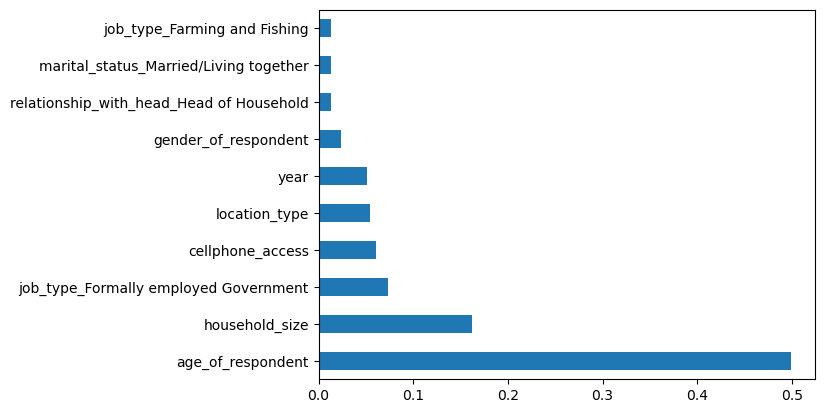

In [69]:
###Feature Importance
X=X_train.iloc[:,0:20]
y=y_train


from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
#use inbuilt class features_imoortance of tree based classifier
#plot graph of feature importances for better visualization
feat_importances=pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   year                                        23524 non-null  int64
 1   location_type                               23524 non-null  int32
 2   cellphone_access                            23524 non-null  int32
 3   household_size                              23524 non-null  int64
 4   age_of_respondent                           23524 non-null  int64
 5   gender_of_respondent                        23524 non-null  int32
 6   relationship_with_head_Child                23524 non-null  uint8
 7   relationship_with_head_Head of Household    23524 non-null  uint8
 8   relationship_with_head_Other non-relatives  23524 non-null  uint8
 9   relationship_with_head_Other relative       23524 non-null  uint8
 10  relationship_with_head_Parent     

In [71]:
X_train

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training
0,2018,0,1,3,24,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,2018,0,0,5,70,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,2018,1,1,5,26,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,2018,0,1,5,34,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,2018,1,0,8,26,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,0,1,4,48,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
23520,2018,0,1,2,27,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
23521,2018,0,1,5,27,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
23522,2018,1,1,7,30,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [72]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [73]:
X_train, X_test, y_train, y_test=train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [74]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
ec=ExtraTreesClassifier()
###XGB=XGBclassifier()


In [75]:
lr.fit(X_train, y_train)


LogisticRegression()

In [76]:
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [77]:
rf.fit(X_train, y_train)


RandomForestClassifier()

In [78]:
ec.fit(X_train, y_train)

ExtraTreesClassifier()

In [79]:
y_lr=lr.predict(X_test)
y_knn=knn.predict(X_test)
y_rf=rf.predict(X_test)
y_ec=ec.predict(X_test)

In [80]:
print('y_lr', y_lr)
print('y_knn', y_knn)
print('y_rf', y_rf)
print('y_ec', y_ec)

y_lr [0 0 0 ... 0 0 0]
y_knn [0 0 0 ... 0 0 0]
y_rf [0 0 0 ... 0 0 1]
y_ec [0 0 0 ... 0 0 1]


In [81]:
from sklearn.metrics import accuracy_score
accuracy_1=accuracy_score(y_test, y_lr)
accuracy_2=accuracy_score(y_test, y_knn)
accuracy_3=accuracy_score(y_test, y_rf)
accuracy_4=accuracy_score(y_test, y_ec)
print('accuracy1', accuracy_1, '\naccuracy_2', accuracy_2, '\naccuracy_3', accuracy_3, '\naccuracy_4', accuracy_4)

accuracy1 0.8809776833156217 
accuracy_2 0.8716259298618491 
accuracy_3 0.8639744952178533 
accuracy_4 0.8533475026567482


In [82]:
MSE= mean_squared_error(y_test, y_pred=y_lr)
print('MSE: {}'. format(MSE))
print("rmse:", np.sqrt(MSE))

MSE: 0.11902231668437832
rmse: 0.34499611111486217


In [83]:
y_pred=y_lr

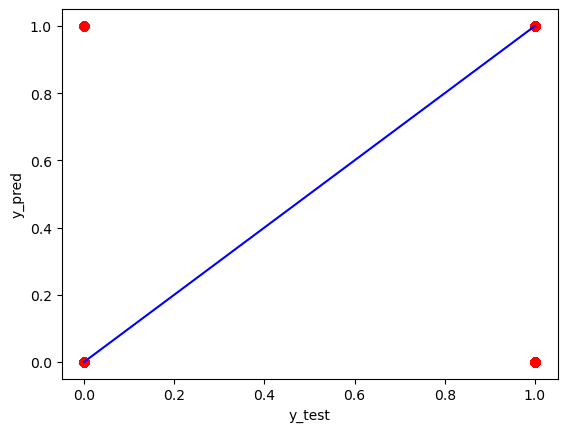

In [84]:
plt.scatter(y_test, y_pred, c='r')
plt.xlabel('y_test', fontsize = 10)
plt.ylabel('y_pred', fontsize = 10)
plt.plot(y_test, y_test, c='blue', label ='regression line')
plt.show()

In [85]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [86]:
test['location_type']=le.fit_transform(test['location_type'])
test['cellphone_access']=le.fit_transform(test['cellphone_access'])
test['gender_of_respondent']=le.fit_transform(test['gender_of_respondent'])

In [87]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,1,1,3,30,1,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,1,1,7,51,1,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,0,0,3,77,0,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,0,0,6,39,0,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,1,0,3,16,1,Child,Single/Never Married,Secondary education,Remittance Dependent


In [88]:
cols=["relationship_with_head", "marital_status","job_type"]
test=pd.get_dummies(test, prefix_sep="_", columns=cols)

In [89]:
cols=["country"]
test=pd.get_dummies(test, prefix_sep="_", columns=cols)

In [90]:
cols=["education_level"]
test=pd.get_dummies(test, prefix_sep="_", columns=cols)

In [91]:
test.head()

,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training
0,2018,uniqueid_6056,1,1,3,30,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,2018,uniqueid_6060,1,1,7,51,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,2018,uniqueid_6065,0,0,3,77,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,2018,uniqueid_6072,0,0,6,39,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,2018,uniqueid_6073,1,0,3,16,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [92]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 38 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   year                                             10086 non-null  int64 
 1   uniqueid                                         10086 non-null  object
 2   location_type                                    10086 non-null  int32 
 3   cellphone_access                                 10086 non-null  int32 
 4   household_size                                   10086 non-null  int64 
 5   age_of_respondent                                10086 non-null  int64 
 6   gender_of_respondent                             10086 non-null  int32 
 7   relationship_with_head_Child                     10086 non-null  uint8 
 8   relationship_with_head_Head of Household         10086 non-null  uint8 
 9   relationship_with_head_Other non-relati

In [93]:
x_test=test.drop(columns=['uniqueid'], axis=1)

In [94]:
x_test.head()

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training
0,2018,1,1,3,30,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,2018,1,1,7,51,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2018,0,0,3,77,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,2018,0,0,6,39,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,2018,1,0,3,16,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [95]:
lr_pred=lr.predict(x_test)

In [96]:
lr_pred

array([0, 0, 1, ..., 0, 0, 0])

In [98]:
##from sklearn.metrics import confusion_matrix, classification_report
##print(classification_report(y_train, y_lr, target_names=target_names))

In [100]:
pip install plot_confusion_matrix

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pip install metrics

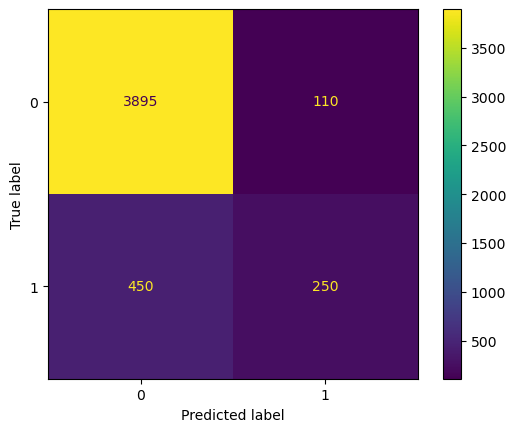

In [116]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()